In [1]:
import pickle
from scipy import sparse
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np
import spektral
import os
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import keras_tuner as kt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline, BSpline
import pandas as pd
import openpyxl

In [15]:
batch = pd.read_excel(r"C:\Users\buing\Documents\CBE 424\membrane\figure task 1.xlsx")
print(batch)

   feed P  delta PO2  delta PN2  delta P         total  J_feed (mmol/s)  \
0    69.0    7.66150   65.83650  7.66150   6699.764274         4.984944   
1    69.0    7.60365   65.36515  7.60365   8095.548498         6.023474   
2    69.0    7.61000   66.44660  7.61000   6141.450584         4.569532   
3    69.0    7.40410   67.56390  7.40410   5303.980050         3.946414   
4    69.0    7.52835   64.79365  7.52835   6699.764274         4.984944   
5     NaN        NaN        NaN      NaN           NaN              NaN   
6    82.0    8.93105   77.68475  8.93105  11402.035415         8.483657   
7    54.0    5.60610   53.42130  5.60610   5816.902126         4.328052   
8    40.0    3.88185   41.35135  3.88185   4513.455976         3.358226   

   J_per (mmol/s)  J_ret(mmol/s)   per+ret  Unnamed: 9  ...  \
0        2.801970       2.455357  5.257328         NaN  ...   
1        2.900864       3.329613  6.230477         NaN  ...   
2        2.752524       1.860119  4.612643         NaN  ... 

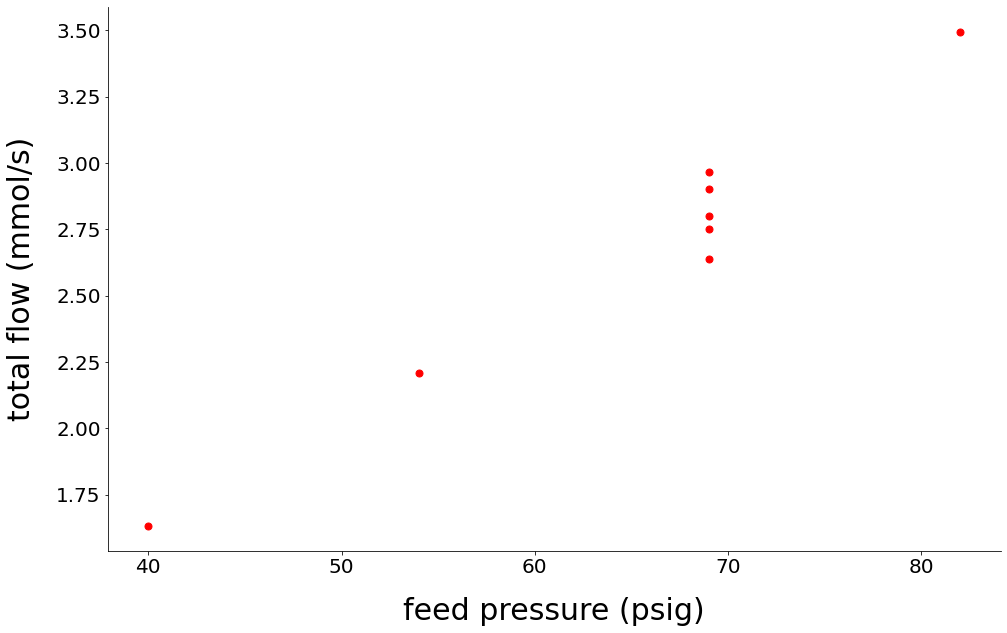

In [30]:
fig = figure(figsize = (16,10))
#total flux at permeate
n = 1
lw = 7
plt.plot(batch["feed P"],batch["J_per (mmol/s)"],'ro', markersize = lw)

#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

#legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
plt.ylabel(r"total flow (mmol/s)", fontsize = 30,labelpad=20)
plt.xlabel(r"feed pressure (psig)",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

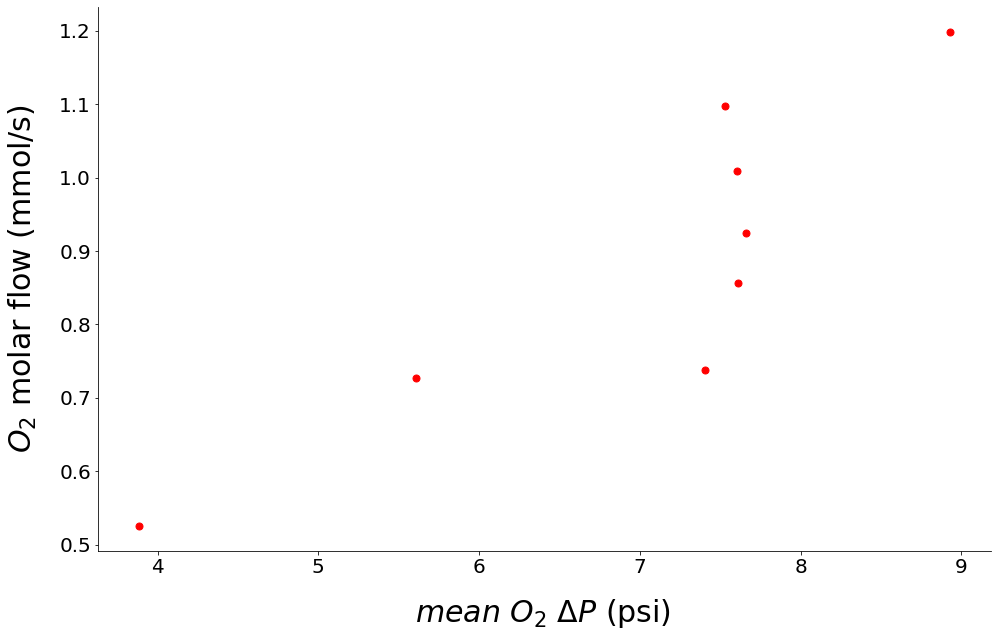

In [31]:
fig = figure(figsize = (16,10))
#total flux at permeate
n = 1
lw = 7
plt.plot(batch["delta PO2"],batch["J_per (mmol/s).1"],'ro', markersize = lw)

#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

#legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
plt.ylabel(r"$O_2$ molar flow (mmol/s)", fontsize = 30,labelpad=20)
plt.xlabel(r"$ mean$ $ O_2$ $ \Delta P$ (psi) ",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')

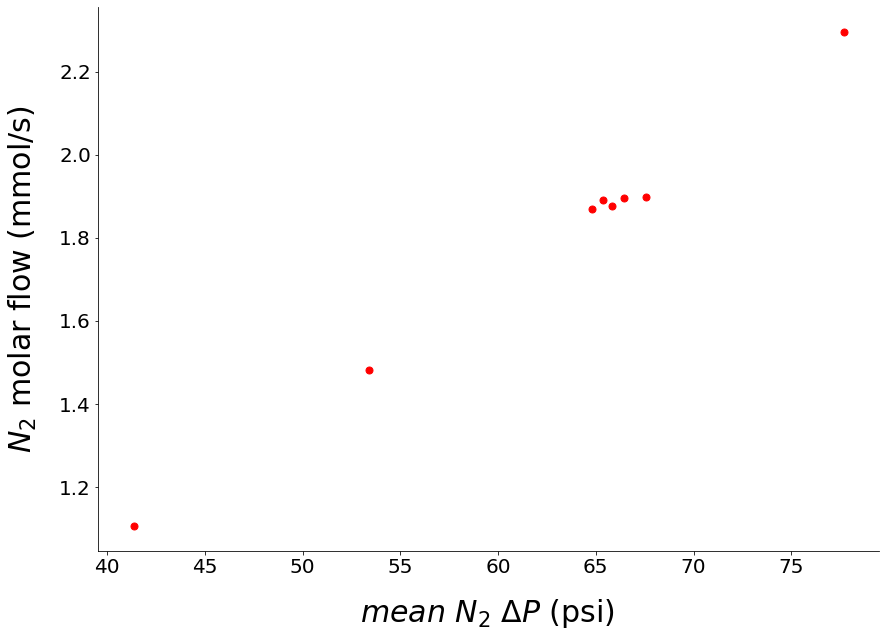

In [26]:
fig = figure(figsize = (16,10))
#total flux at permeate
n = 1
lw = 7
plt.plot(batch["delta PN2"],batch["J_per (mmol/s).2"],'ro', markersize = lw)

#plt.plot(t_int,f1,'r-', linewidth = 1, label = "model 1")
#plt.plot(t_int,f2,'b-',linewidth = 1,label = "model 2")
#plt.plot(t_int,f3,'g-',linewidth = 1, label = "model 3")

#legend = plt.legend(ncol = 2, loc = 'best', fontsize = 20)
plt.ylabel(r"$N_2$ molar flow (mmol/s)", fontsize = 30,labelpad=20)
plt.xlabel(r"$ mean$ $ N_2$ $ \Delta P$ (psi) ",fontsize = 30,labelpad=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')